#### Q(a) Predicting California Housing Prices Using Linear & Regularized Regression

In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [78]:
# Data set loading 

df_a = pd.read_excel('QA.xlsx')
df_a.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


#### Exploratory Data analysis
 Summary Statistics

In [79]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseValue,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


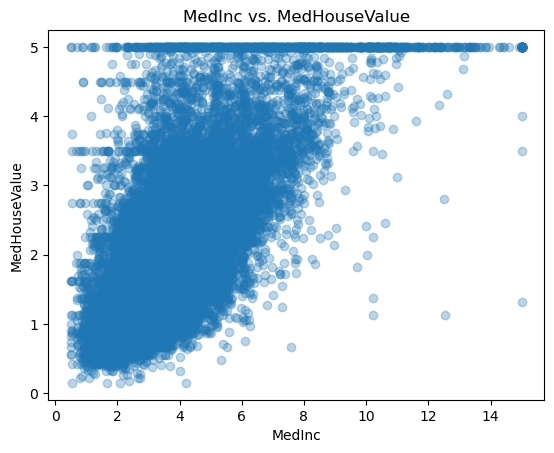

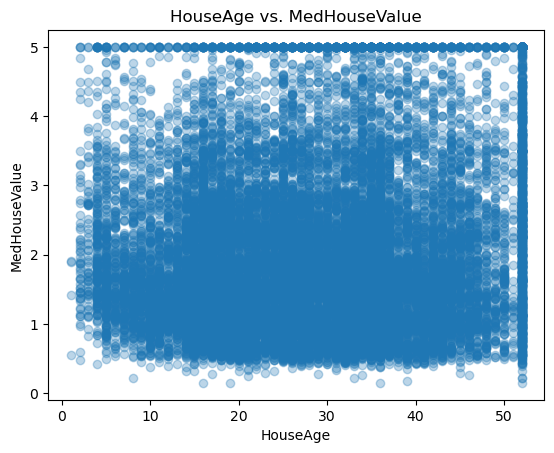

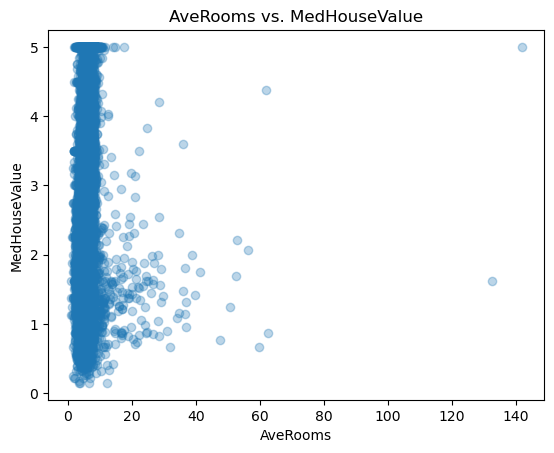

In [80]:
# Scatter plots vs MedHouseVal

os.makedirs('images', exist_ok=True)

features = ['MedInc', 'HouseAge', 'AveRooms']
for f in features:
    plt.figure()
    plt.scatter(df_a[f], df_a['MedHouseValue'], alpha=0.3)
    plt.xlabel(f)
    plt.ylabel('MedHouseValue')
    plt.title(f'{f} vs. MedHouseValue')
    
 
    filename = f'images/{f}_vs_MedHouseValue.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    

    plt.show()
    plt.close()

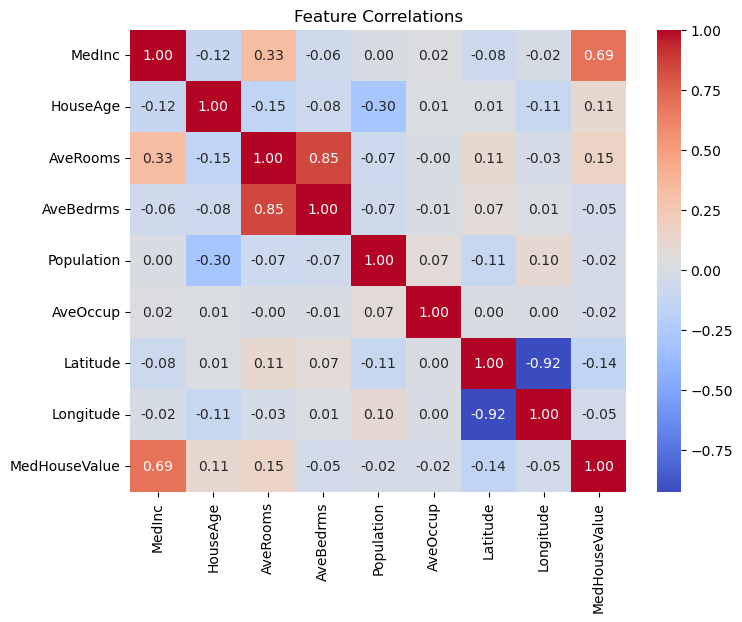

In [81]:
# Correlation Heatmaps

plt.figure(figsize=(8,6))
sns.heatmap(df_a.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlations')

out_path = 'images/feature_correlations.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

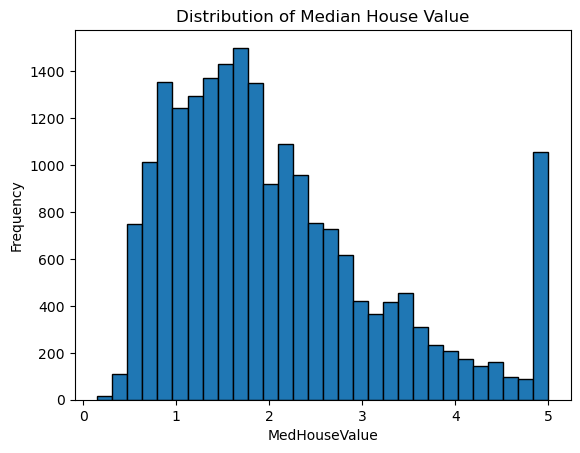

In [82]:
# Target Distribution 

plt.hist(df_a['MedHouseValue'], bins=30, edgecolor='k')
plt.title('Distribution of Median House Value')
plt.xlabel('MedHouseValue'); plt.ylabel('Frequency')

out_path = 'images/distribution.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

#### Preprocessing

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
# split data 

X = df_a.drop('MedHouseValue', axis=1)
y = df_a['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


#### Linear Regression 

In [85]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_scaled, y_train)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.071946937378881


#### Evaluation: LR

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_pred = lr.predict(X_test_scaled)
print("R²:",  r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
mse = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R²: 0.575787706032451
MAE: 0.5332001304956565
RMSE: 0.7302055398965804


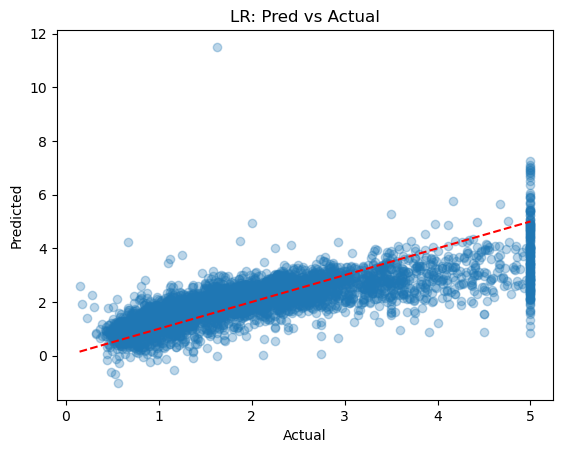

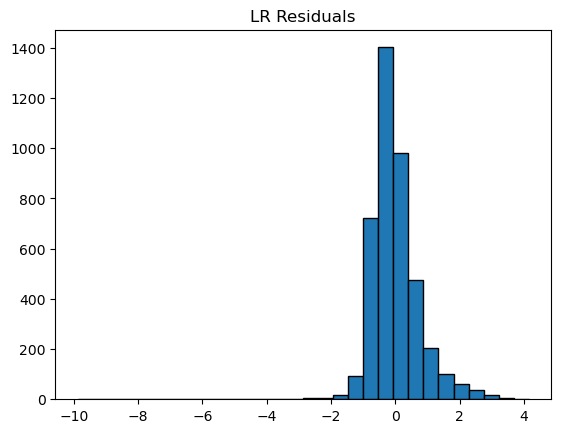

<Figure size 640x480 with 0 Axes>

In [87]:
# Pred vs Actual
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("LR: Pred vs Actual")
plt.show()

out_path = 'images/predvsact.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')

# Residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("LR Residuals")
plt.show()

out_path2 = 'images/rediduals.png'
plt.savefig(out_path2, dpi=300, bbox_inches='tight')


In [88]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, lr.predict(X_train_scaled))
test_r2  = r2_score(y_test,  lr.predict(X_test_scaled))
print(train_r2, test_r2)


0.6125511913966952 0.575787706032451


### Interpretation

- **Top Positive Predictors**  
  - **MedInc (0.854)**: Median income is the strongest driver—higher income areas fetch notably higher house values.  
  - **AveBedrms (0.339)**: More bedrooms per household also boost prices, though to a lesser extent.

- **Top Negative Predictors**  
  - **Latitude (–0.897)** and **Longitude (–0.870)**: Geographic location has a large negative effect—houses further north or east in this dataset tend to be cheaper.  
  - **AveRooms (–0.294)**: Surprisingly, a higher average room count correlates with lower values, likely reflecting trade-offs in room size or older housing.

- **Over-/Under-fitting Check**  
  - **Train R² = 0.613**, **Test R² = 0.576** (Δ ≈ 0.037): The small drop in R² on test data shows only minimal overfitting and indicates the model generalizes reasonably well.


In [89]:

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# fit your models
ridge = RidgeCV(alphas=[0.1, 1, 10]).fit(X_train_scaled, y_train)
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1]).fit(X_train_scaled, y_train)

for name, model in [('Ridge', ridge), ('Lasso', lasso)]:
    y_p = model.predict(X_test_scaled)
    
    # metrics
    r2   = r2_score(y_test, y_p)
    mae  = mean_absolute_error(y_test, y_p)
    mse  = mean_squared_error(y_test, y_p)    
    rmse = np.sqrt(mse)                       
    
    nz = (model.coef_ != 0).sum()            
    
    print(f"{name} R²:   {r2:.4f}")
    print(f"{name} MAE:  {mae:.4f}")
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} nonzero coefs: {nz}\n")



Ridge R²:   0.5758
Ridge MAE:  0.5332
Ridge RMSE: 0.7456
Ridge nonzero coefs: 8

Lasso R²:   0.5769
Lasso MAE:  0.5331
Lasso RMSE: 0.7446
Lasso nonzero coefs: 8



In [90]:
## Feature engineering

df_a['Households'] = df_a['Population'] / df_a['AveOccup']

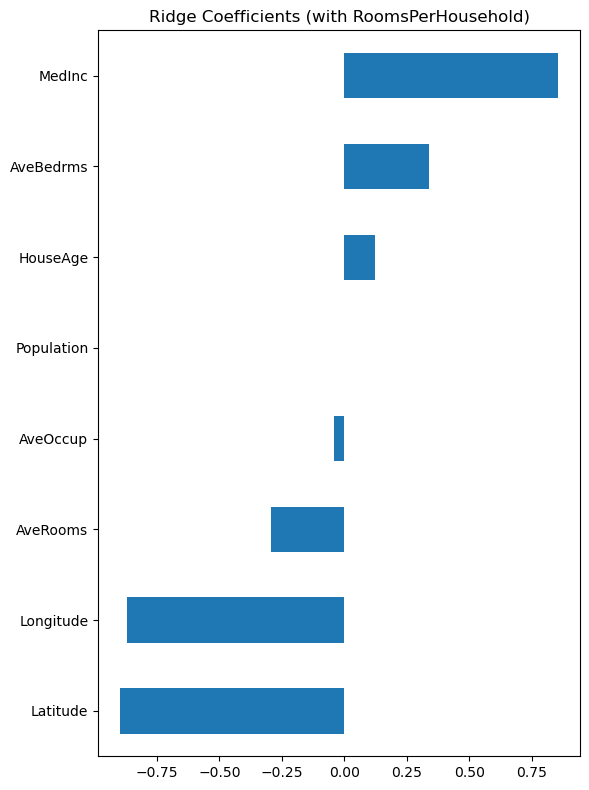

In [91]:
# Retrain with the New feature
from sklearn.linear_model import RidgeCV

# Retrain a Ridge model (with CV) on the data including RoomsPerHousehold
ridge_feat = RidgeCV(alphas=[0.1, 1, 10], cv=5).fit(X_train_scaled, y_train)

# inspect the new coefficients
import pandas as pd
coef_df = pd.Series(ridge_feat.coef_, index=X.columns).sort_values()
coef_df.plot.barh(figsize=(6,8))
plt.title("Ridge Coefficients (with RoomsPerHousehold)")
plt.tight_layout()
plt.savefig('images/ridge_feature_eng_coefs.png', dpi=300)
plt.show()


In [92]:
## Final Evaluation 

def get_metrics(name, model, X_tr, y_tr, X_te, y_te):
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)
    
    mse_te = mean_squared_error(y_te, y_te_pred)
    rmse_te = np.sqrt(mse_te)
    
    return {
        'Model':    name,
        'Train R2': r2_score(y_tr, y_tr_pred),
        'Test R2':  r2_score(y_te, y_te_pred),
        'Test MAE': mean_absolute_error(y_te, y_te_pred),
        'Test RMSE': rmse_te
    }

results = [
    get_metrics("Original LR",    lr,         X_train_scaled, y_train, X_test_scaled, y_test),
    get_metrics("Ridge + NewFeat", ridge_feat, X_train_scaled, y_train, X_test_scaled, y_test)
]

metrics_df = pd.DataFrame(results).set_index('Model')
print(metrics_df)


                 Train R2   Test R2  Test MAE  Test RMSE
Model                                                   
Original LR      0.612551  0.575788  0.533200   0.745581
Ridge + NewFeat  0.612551  0.575791  0.533199   0.745579


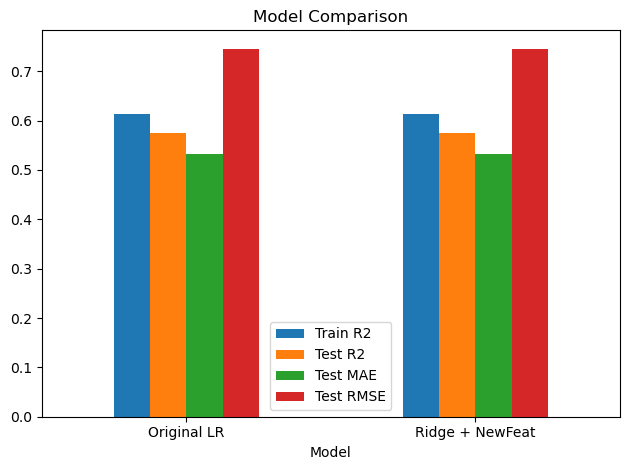

In [93]:
metrics_df.plot.bar(rot=0)
plt.title("Model Comparison")
plt.tight_layout()
plt.savefig('images/model_comparison.png', dpi=300)
plt.show()


Polynomial (deg=2) + Ridge Test R²: 0.659


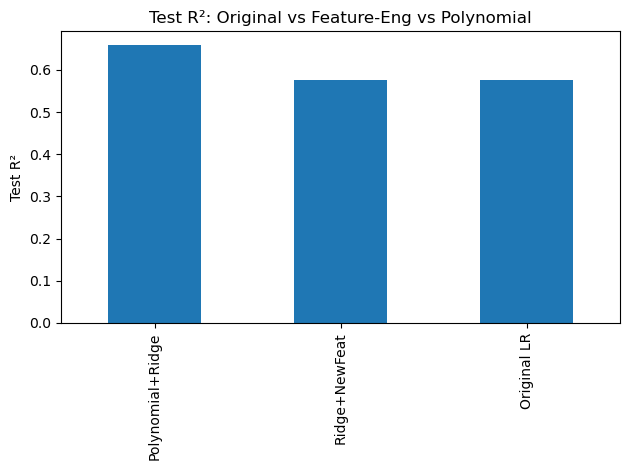

In [94]:
### Bonus Q(A) Polynomial Features + Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Pipeline: generate degree-2 features then RidgeCV
poly_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', RidgeCV(alphas=[1, 10, 100], cv=5))
]).fit(X_train_scaled, y_train)

# Evaluate
y_poly_pred = poly_ridge.predict(X_test_scaled)
poly_r2 = r2_score(y_test, y_poly_pred)
print(f"Polynomial (deg=2) + Ridge Test R²: {poly_r2:.3f}")

# Plot its performance vs. others
poly_metrics = {
    'Polynomial+Ridge': poly_r2,
    'Ridge+NewFeat' : metrics_df.loc['Ridge + NewFeat','Test R2'],
    'Original LR'   : metrics_df.loc['Original LR','Test R2']
}
pd.Series(poly_metrics).plot.bar()
plt.ylabel("Test R²")
plt.title("Test R²: Original vs Feature-Eng vs Polynomial")
plt.tight_layout()
plt.savefig('images/bonus_poly_comparison.png', dpi=300)
plt.show()


### Q(B) Predicting Income with Logistic Regression

In [100]:
## Data Loading & Exploration
df_b = pd.read_csv('QB.csv')
df_b.head(), df2.info(), df2.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  float64
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    32561 non-null  float64
 11  capital.loss    32561 non-null  float64
 12  hours.per.week  32561 non-null  float64
 13  native.country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


(   age workclass  fnlwgt     education  education.num marital.status  \
 0   90         ?   77053       HS-grad              9        Widowed   
 1   82   Private  132870       HS-grad              9        Widowed   
 2   66         ?  186061  Some-college             10        Widowed   
 3   54   Private  140359       7th-8th              4       Divorced   
 4   41   Private  264663  Some-college             10      Separated   
 
           occupation   relationship   race     sex  capital.gain  \
 0                  ?  Not-in-family  White  Female             0   
 1    Exec-managerial  Not-in-family  White  Female             0   
 2                  ?      Unmarried  Black  Female             0   
 3  Machine-op-inspct      Unmarried  White  Female             0   
 4     Prof-specialty      Own-child  White  Female             0   
 
    capital.loss  hours.per.week native.country income  
 0          4356              40  United-States  <=50K  
 1          4356              

In [112]:
print("Shape:", df_b.shape)
display(df_b.head())
display(df_b.info())
os.makedirs('Images(Q_B)', exist_ok=True)

Shape: (30162, 97)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,3.316630,-0.538790,-0.439738,-0.147445,10.555814,-1.914161,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,1.184831,-0.467906,-2.400559,-0.147445,9.427915,-0.077734,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0.195067,0.708645,-0.047574,-0.147445,9.427915,-0.077734,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,-0.337883,0.256222,-0.439738,-0.147445,9.106365,0.339636,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,-0.033340,-0.370964,-1.616231,-0.147445,9.106365,-0.077734,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        30162 non-null  float64
 1   fnlwgt                                     30162 non-null  float64
 2   education.num                              30162 non-null  float64
 3   capital.gain                               30162 non-null  float64
 4   capital.loss                               30162 non-null  float64
 5   hours.per.week                             30162 non-null  float64
 6   income                                     30162 non-null  int64  
 7   workclass_Local-gov                        30162 non-null  bool   
 8   workclass_Private                          30162 non-null  bool   
 9   workclass_Self-emp-inc                     30162 non-null  bool   
 10  workclass_Self-emp-not-inc 

None

In [113]:
# Replace '?' with NaN, drop missing
df_b.replace('?', np.nan, inplace=True)
df_b.dropna(inplace=True)

In [114]:
# Identify cols
num_cols = [
    'age','fnlwgt','education.num',
    'capital.gain','capital.loss','hours.per.week'
]
cat_cols = [
    'workclass','education','marital.status',
    'occupation','relationship','race','sex','native.country'
]

In [115]:
# One-hot encode categoricals
df_b = pd.get_dummies(df_b, columns=cat_cols, drop_first=True)

# Scale numerics
scaler = StandardScaler().fit(df_b[num_cols])
df_b[num_cols] = scaler.transform(df_b[num_cols])

# Encode target
df_b['income'] = df_b['income'].map({'<=50K': 0, '>50K': 1})

# Split
X = df_b.drop('income', axis=1)
y = df_b['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

KeyError: "None of [Index(['workclass', 'education', 'marital.status', 'occupation',\n       'relationship', 'race', 'sex', 'native.country'],\n      dtype='object')] are in the [columns]"

Intercept: -3.2914878282781097
Top positive features:
 native.country_Italy                 0.754539
race_Asian-Pac-Islander              0.797035
education.num                        0.801928
sex_Male                             0.808045
occupation_Exec-managerial           0.809794
education_1st-4th                    0.857939
relationship_Wife                    1.292148
marital.status_Married-civ-spouse    1.575356
marital.status_Married-AF-spouse     1.825244
capital.gain                         2.339587
dtype: float64
Top negative features:
 occupation_Priv-house-serv    -1.485144
native.country_Columbia       -1.278839
relationship_Own-child        -1.116676
workclass_Self-emp-not-inc    -1.035583
relationship_Other-relative   -0.917535
workclass_State-gov           -0.893395
native.country_South          -0.890438
occupation_Farming-fishing    -0.859121
workclass_Without-pay         -0.840842
occupation_Other-service      -0.763340
dtype: float64


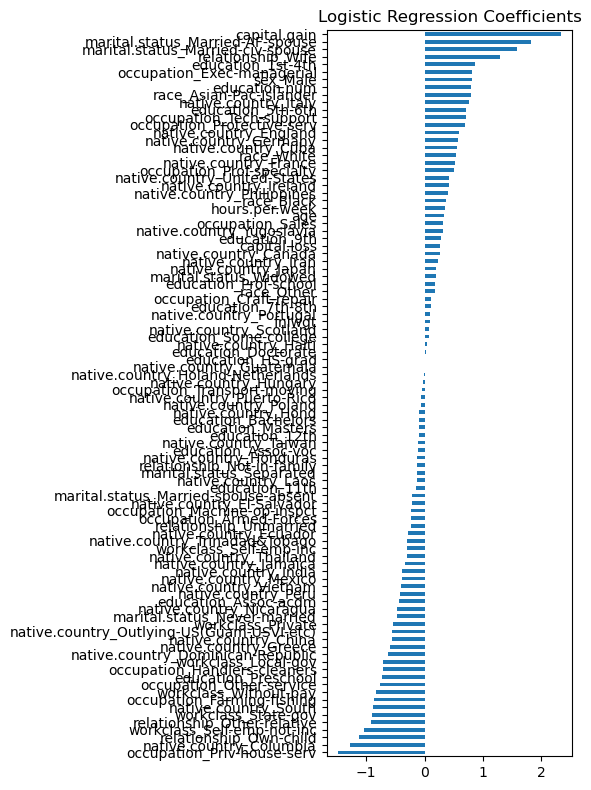

In [116]:
# Logistic Regression
from sklearn.linear_model    import LogisticRegression
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
coef = pd.Series(clf.coef_[0], index=X.columns).sort_values()

# Print intercept + top features
print("Intercept:", clf.intercept_[0])
print("Top positive features:\n", coef.tail(10))
print("Top negative features:\n", coef.head(10))

# Plot & save coefficient bar chart
plt.figure(figsize=(6,8))
coef.plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.savefig('Images(Q_B)/logreg_coefficients.png', dpi=300)
plt.show()
plt.close()

In [117]:
# Evaluation

from sklearn.metrics         import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Core metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}
print(metrics)


{'Accuracy': 0.8420354715730151, 'Precision': 0.7203867848509267, 'Recall': 0.596, 'F1 Score': 0.6523166727471725}


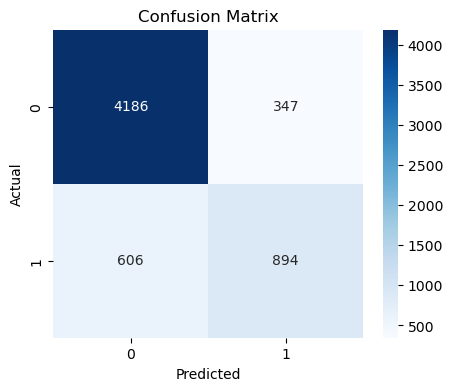

In [118]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.savefig('Images(Q_B)/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

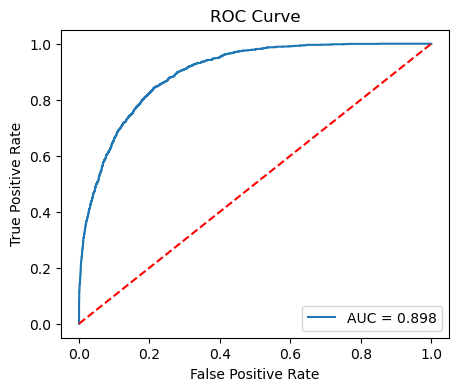

In [119]:
# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.savefig('Images(Q_B)/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [120]:
# ─── Q5. Interpretation ───────────────────────────────────────────────────────
print("Feature Impact Summary:")
print("  - Highest positive coefficients (push towards >50K):")
print(coef.tail(5))
print("  - Highest negative coefficients (push towards <=50K):")
print(coef.head(5))
print("\nDiscuss potential biases (e.g., gender/occupation) and limitations here.")

Feature Impact Summary:
  - Highest positive coefficients (push towards >50K):
education_1st-4th                    0.857939
relationship_Wife                    1.292148
marital.status_Married-civ-spouse    1.575356
marital.status_Married-AF-spouse     1.825244
capital.gain                         2.339587
dtype: float64
  - Highest negative coefficients (push towards <=50K):
occupation_Priv-house-serv    -1.485144
native.country_Columbia       -1.278839
relationship_Own-child        -1.116676
workclass_Self-emp-not-inc    -1.035583
relationship_Other-relative   -0.917535
dtype: float64

Discuss potential biases (e.g., gender/occupation) and limitations here.
